<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/BackwardNN%EF%BC%BFn3000_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
# 必要なライブラリのimport
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [443]:
# データの準備、読み込み


## データファイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

one_hole_position_raw_path = 'one_hole_position_data_raw.csv'
four_holes_position_raw_path = 'four_holes_position_data_raw.csv'
nine_holes_position_raw_path = 'nine_holes_position_data_raw.csv'
sixteen_holes_position_raw_path = 'sixteen_holes_position_data_raw.csv'
twentyfive_holes_position_raw_path = 'twentyfive_holes_position_data_raw.csv'


## csvファイルをリスト化

### 穴なしの温度分布データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))
lst_f0 = [r[:-1] for r in lst_f0]

### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

### raw位置に関するデータ
with open(one_hole_position_raw_path) as fp1_raw:
  lst_fp1_raw = list(csv.reader(fp1_raw))
with open(four_holes_position_raw_path) as fp2_raw:
  lst_fp2_raw = list(csv.reader(fp2_raw))
with open(nine_holes_position_raw_path) as fp3_raw:
  lst_fp3_raw = list(csv.reader(fp3_raw))
with open(sixteen_holes_position_raw_path) as fp4_raw:
  lst_fp4_raw = list(csv.reader(fp4_raw))
with open(twentyfive_holes_position_raw_path) as fp5_raw:
  lst_fp5_raw = list(csv.reader(fp5_raw))

In [444]:
# model_1

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
n = 3000                    #nは総抽出データ数
train = 0.8                 #train:validのtrainデータの割合
seed = 0                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("dummy_lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("dummy_lst_fs"+str(i)+"_train = dummy_lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("dummy_lst_fs"+str(i)+"_valid = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("dummy_lst_fs"+str(i)+"_test = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

random.seed(seed)

for i in range(1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_raw_shuffle = random.sample(lst_fp"+str(i)+"_raw, len(lst_fp"+str(i)+"_raw))")
  exec("lst_fp"+str(i)+"_raw_train = lst_fp"+str(i)+"_raw_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_raw_valid = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_raw_test = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[1:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[1:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[1:-1] for r in lst_fp"+str(i)+"_test]")

  exec("lst_x_fp"+str(i)+"_raw_train = [r[0:2] for r in lst_fp"+str(i)+"_raw_train]")
  exec("lst_x_fp"+str(i)+"_raw_valid = [r[0:2] for r in lst_fp"+str(i)+"_raw_valid]")
  exec("lst_x_fp"+str(i)+"_raw_test = [r[0:2] for r in lst_fp"+str(i)+"_raw_test]")


### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

lst_x_fp_raw_train = lst_x_fp1_raw_train + lst_x_fp2_raw_train + lst_x_fp3_raw_train + lst_x_fp4_raw_train + lst_x_fp5_raw_train
lst_x_fp_raw_valid = lst_x_fp1_raw_valid + lst_x_fp2_raw_valid + lst_x_fp3_raw_valid + lst_x_fp4_raw_valid + lst_x_fp5_raw_valid
lst_x_fp_raw_test = lst_x_fp1_raw_test + lst_x_fp2_raw_test + lst_x_fp3_raw_test + lst_x_fp4_raw_test + lst_x_fp5_raw_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

lst_x_fp_raw_train = np.array(lst_x_fp_raw_train, dtype=int)
lst_x_fp_raw_valid = np.array(lst_x_fp_raw_valid, dtype=int)
lst_x_fp_raw_test = np.array(lst_x_fp_raw_test, dtype=int)

### 大きさデータを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)
x_fp_train = lst_x_fp_train.reshape(-1, 1)
x_fp_valid = lst_x_fp_valid.reshape(-1, 1)
x_fp_test = lst_x_fp_test.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fp_train_n = scaler_x.fit_transform(x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(x_fp_test) 

x_fp_raw_train_n = scaler_x.fit_transform(lst_x_fp_raw_train)
x_fp_raw_valid_n = scaler_x.fit_transform(lst_x_fp_raw_valid)
x_fp_raw_test_n = scaler_x.fit_transform(lst_x_fp_raw_test)

In [445]:
# データ拡張

## 作成済モデルでデータ生成

model = load_model(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")
y_expand_data = model.predict([x_fs_test_n, x_fp_raw_test_n])
y_expand_data

array([[-0.01554966, -0.01298701, -0.01270833, ..., -0.03566506,
        -0.03311147, -0.0311748 ],
       [-0.08306216, -0.06377483, -0.06278316, ..., -0.15449256,
        -0.15744057, -0.15693665],
       [ 0.00976466,  0.00957876,  0.00945746, ...,  0.02329478,
         0.02325381,  0.02323581],
       ...,
       [-0.42708534, -0.4113872 , -0.36762628, ..., -0.05424393,
        -0.05348612, -0.05821864],
       [ 0.05507591,  0.05540215,  0.05522765, ..., -0.9289188 ,
        -1.0048972 , -1.028476  ],
       [ 1.7214499 ,  1.7214303 ,  1.7144221 , ...,  0.18058905,
         0.18049407,  0.18053292]], dtype=float32)

In [446]:
y_expand_data.shape

(7130, 50)

In [447]:
lst_x_fp_raw_test

array([[ 8, 24],
       [ 1, 30],
       [26, 42],
       ...,
       [ 5,  7],
       [ 4, 37],
       [19,  1]])

In [448]:
lst_x_fp_test

array([ 3,  4, 15, ...,  1,  4,  6])

In [449]:
y_train.shape

(2400, 50)

In [450]:
y_valid.shape

(600, 50)

In [451]:
## データセット作成

### 拡張前セット
X_not_expanded_data = np.concatenate([y_train, y_valid])
size_Y_not_expanded_data = np.concatenate([x_fs_train, x_fs_valid])
position_Y_not_expanded_data = np.concatenate([x_fp_train, x_fp_valid])

### 拡張後セット
X_data = np.concatenate([y_train, y_valid, y_expand_data])
size_Y_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test])
position_Y_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test])

### 正解データセット
X_ans_data = np.concatenate([y_train, y_valid, y_test])
size_Y_ans_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test])
position_Y_ans_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test])

In [452]:
## データ加工
size_Y_data = keras.utils.to_categorical(size_Y_data, 6)
position_Y_data = keras.utils.to_categorical(position_Y_data, 26)

size_Y_not_expanded_data = keras.utils.to_categorical(size_Y_not_expanded_data, 6)
position_Y_not_expanded_data = keras.utils.to_categorical(position_Y_not_expanded_data, 26)

size_Y_ans_data = keras.utils.to_categorical(size_Y_ans_data, 6)
position_Y_ans_data = keras.utils.to_categorical(position_Y_ans_data, 26)

In [453]:
### train用とtest用に分割(4:1)
X_train, X_test, size_Y_train, size_Y_test, position_Y_train, position_Y_test = train_test_split(X_data, size_Y_data, position_Y_data, test_size=0.20)
### train用とtest用に分割(4:1)
X_ne_train, X_ne_test, size_Y_ne_train, size_Y_ne_test, position_Y_ne_train, position_Y_ne_test = train_test_split(X_not_expanded_data, size_Y_not_expanded_data, position_Y_not_expanded_data, test_size=0.20)

In [454]:
X_train = X_train.reshape(-1, 50, 1)
X_test = X_test.reshape(-1, 50, 1)
X_ne_train = X_ne_train.reshape(-1, 50, 1)
X_ne_test = X_ne_test.reshape(-1, 50, 1)
X_ans_data = X_ans_data.reshape(-1, 50, 1)

In [455]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [456]:
# 学習(大きさ)
epochs = 500
batch_size = 128
size_history = size_model.fit(X_train, size_Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, size_Y_test))

Epoch 1/500
64/64 [==============================] - 1s 9ms/step - loss: 1.6127 - accuracy: 0.2130 - val_loss: 1.2228 - val_accuracy: 0.6792
Epoch 2/500
64/64 [==============================] - 0s 6ms/step - loss: 1.1022 - accuracy: 0.7412 - val_loss: 0.8282 - val_accuracy: 0.8006
Epoch 3/500
64/64 [==============================] - 0s 7ms/step - loss: 0.7600 - accuracy: 0.8613 - val_loss: 0.6237 - val_accuracy: 0.9057
Epoch 4/500
64/64 [==============================] - 0s 6ms/step - loss: 0.5688 - accuracy: 0.9152 - val_loss: 0.4949 - val_accuracy: 0.9102
Epoch 5/500
64/64 [==============================] - 0s 7ms/step - loss: 0.4461 - accuracy: 0.9252 - val_loss: 0.4158 - val_accuracy: 0.9161
Epoch 6/500
64/64 [==============================] - 0s 7ms/step - loss: 0.3857 - accuracy: 0.9192 - val_loss: 0.3677 - val_accuracy: 0.9205
Epoch 7/500
64/64 [==============================] - 0s 7ms/step - loss: 0.3253 - accuracy: 0.9285 - val_loss: 0.3483 - val_accuracy: 0.9215
Epoch 8/500
6

In [457]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(X_ans_data, size_Y_ans_data, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9858
Test loss: 0.05341197922825813
Test accuracy: 0.9857847690582275


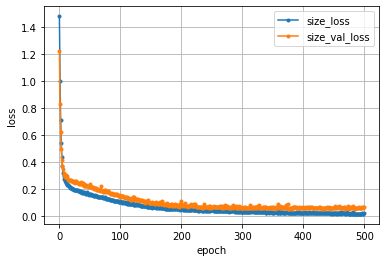

In [458]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

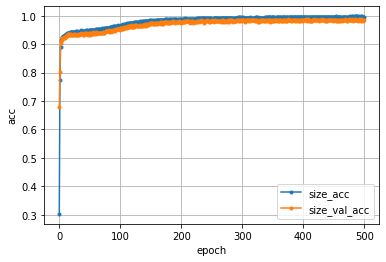

In [459]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [460]:
## 拡張前のデータの学習状況と比較

## CNN(大きさ)

### modelの作成
size_ne_model = Sequential()
### 畳み込み層
size_ne_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_ne_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_ne_model.add(Flatten())
### 全結合層
size_ne_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_ne_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [461]:
# 学習(大きさ)
epochs = 2000
batch_size = 32
size_ne_history = size_ne_model.fit(X_ne_train, size_Y_ne_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ne_test, size_Y_ne_test))

Epoch 1/2000
75/75 [==============================] - 1s 5ms/step - loss: 1.6158 - accuracy: 0.2016 - val_loss: 1.2488 - val_accuracy: 0.5167
Epoch 2/2000
75/75 [==============================] - 0s 3ms/step - loss: 1.1550 - accuracy: 0.5719 - val_loss: 0.8650 - val_accuracy: 0.7750
Epoch 3/2000
75/75 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.8248 - val_loss: 0.6578 - val_accuracy: 0.9000
Epoch 4/2000
75/75 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.8980 - val_loss: 0.5247 - val_accuracy: 0.9233
Epoch 5/2000
75/75 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.9188 - val_loss: 0.4455 - val_accuracy: 0.9183
Epoch 6/2000
75/75 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.9207 - val_loss: 0.3823 - val_accuracy: 0.9267
Epoch 7/2000
75/75 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.9202 - val_loss: 0.3479 - val_accuracy: 0.9233
Epoch 

In [462]:
# モデルの評価(大きさ)
size_ne_score = size_ne_model.evaluate(X_ans_data, size_Y_ans_data, verbose=1)
print('Test loss:', size_ne_score[0])
print('Test accuracy:', size_ne_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.9838
Test loss: 0.1375918984413147
Test accuracy: 0.9838104844093323


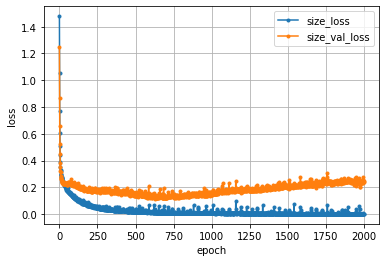

In [463]:
# 学習経過の可視化(大きさ)
size_loss     = size_ne_history.history['loss']
size_val_loss = size_ne_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

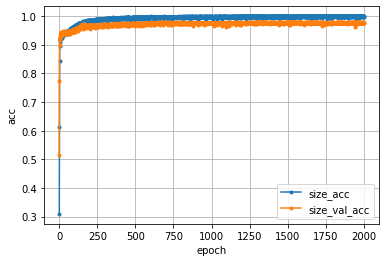

In [464]:
# 学習経過の可視化(大きさ)
size_acc     = size_ne_history.history['accuracy']
size_val_acc = size_ne_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [465]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(26, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [466]:
# 学習(位置)
epochs = 2000
batch_size = 128
position_history = position_model.fit(X_train, position_Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, position_Y_test))

Epoch 1/2000
64/64 [==============================] - 1s 9ms/step - loss: 3.0735 - accuracy: 0.1511 - val_loss: 2.6355 - val_accuracy: 0.2695
Epoch 2/2000
64/64 [==============================] - 0s 6ms/step - loss: 2.5223 - accuracy: 0.3193 - val_loss: 2.3064 - val_accuracy: 0.3529
Epoch 3/2000
64/64 [==============================] - 0s 5ms/step - loss: 2.2214 - accuracy: 0.3852 - val_loss: 2.0904 - val_accuracy: 0.3889
Epoch 4/2000
64/64 [==============================] - 0s 6ms/step - loss: 2.0505 - accuracy: 0.4030 - val_loss: 1.9746 - val_accuracy: 0.3865
Epoch 5/2000
64/64 [==============================] - 0s 6ms/step - loss: 1.9383 - accuracy: 0.4266 - val_loss: 1.8564 - val_accuracy: 0.4363
Epoch 6/2000
64/64 [==============================] - 0s 6ms/step - loss: 1.8290 - accuracy: 0.4529 - val_loss: 1.7591 - val_accuracy: 0.4817
Epoch 7/2000
64/64 [==============================] - 0s 6ms/step - loss: 1.7759 - accuracy: 0.4748 - val_loss: 1.6941 - val_accuracy: 0.4729
Epoch 

In [467]:
# モデルの評価(位置)
position_score = position_model.evaluate(X_ans_data, position_Y_ans_data, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.7731
Test loss: 0.6631952524185181
Test accuracy: 0.7730503678321838


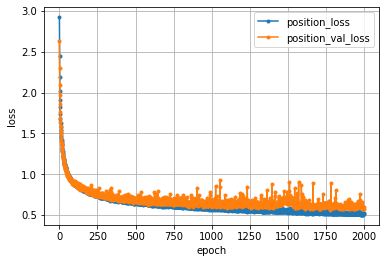

In [468]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

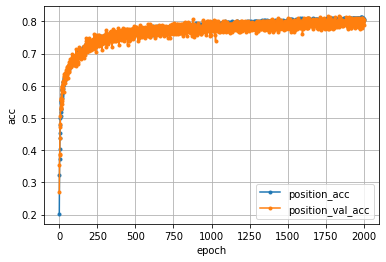

In [469]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [470]:
## CNN(位置)

### modelの作成
position_ne_model = Sequential()
### 畳み込み層
position_ne_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_ne_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_ne_model.add(Flatten())
### 全結合層
position_ne_model.add(Dense(26, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_ne_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# 学習(位置)
epochs = 2000
batch_size = 32
position_ne_history = position_ne_model.fit(X_ne_train, position_Y_ne_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ne_test, position_Y_ne_test))

Epoch 1/2000
75/75 [==============================] - 1s 5ms/step - loss: 3.0677 - accuracy: 0.1295 - val_loss: 2.6882 - val_accuracy: 0.2867
Epoch 2/2000
75/75 [==============================] - 0s 3ms/step - loss: 2.5677 - accuracy: 0.2870 - val_loss: 2.4163 - val_accuracy: 0.2817
Epoch 3/2000
75/75 [==============================] - 0s 2ms/step - loss: 2.3054 - accuracy: 0.3260 - val_loss: 2.2204 - val_accuracy: 0.3333
Epoch 4/2000
75/75 [==============================] - 0s 3ms/step - loss: 2.0966 - accuracy: 0.3877 - val_loss: 2.1004 - val_accuracy: 0.3733
Epoch 5/2000
75/75 [==============================] - 0s 3ms/step - loss: 1.9972 - accuracy: 0.3993 - val_loss: 1.9838 - val_accuracy: 0.3833
Epoch 6/2000
75/75 [==============================] - 0s 3ms/step - loss: 1.9001 - accuracy: 0.4120 - val_loss: 1.9034 - val_accuracy: 0.4250
Epoch 7/2000
75/75 [==============================] - 0s 3ms/step - loss: 1.8251 - accuracy: 0.4491 - val_loss: 1.8241 - val_accuracy: 0.4117
Epoch 

In [ ]:
# モデルの評価(位置)
position_ne_score = position_ne_model.evaluate(X_ans_data, position_Y_ans_data, verbose=1)
print('Test loss:', position_ne_score[0])
print('Test accuracy:', position_ne_score[1])

In [ ]:
# 学習経過の可視化(位置)
position_loss     = position_ne_history.history['loss']
position_val_loss = position_ne_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 学習経過の可視化(位置)
position_acc     = position_ne_history.history['accuracy']
position_val_acc = position_ne_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()